In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
from scipy.stats import linregress
import scipy.stats as st

# Census Api Key
from config import (api_key)

# Migration of People Moving In and Out of CA

In [2]:
# To Create Migration Data Frame from Data collected from various excel files from the census
migration_df = pd.DataFrame({
    "Year":["2013", "2014", "2015", "2016", "2017", "2018"],
    "Into CA":[485477, 513968, 514477, 514758, 523131, 501023],
    "Leaving CA":[581679, 593308, 643710, 657690, 661026, 691145],
    "Difference": [96202, 79340, 129233, 142932, 137895, 190122]})

# To format the columns
migration_df["Into CA"] = migration_df["Into CA"].map("{:,}".format)
migration_df["Leaving CA"] = migration_df["Leaving CA"].map("{:,}".format)
migration_df["Difference"] = migration_df["Difference"].map("{:,}".format)
migration_df

,Year,Into CA,Leaving CA,Difference
0,2013,"485,477","581,679","96,202"
1,2014,"513,968","593,308","79,340"
2,2015,"514,477","643,710","129,233"
3,2016,"514,758","657,690","142,932"
4,2017,"523,131","661,026","137,895"
5,2018,"501,023","691,145","190,122"


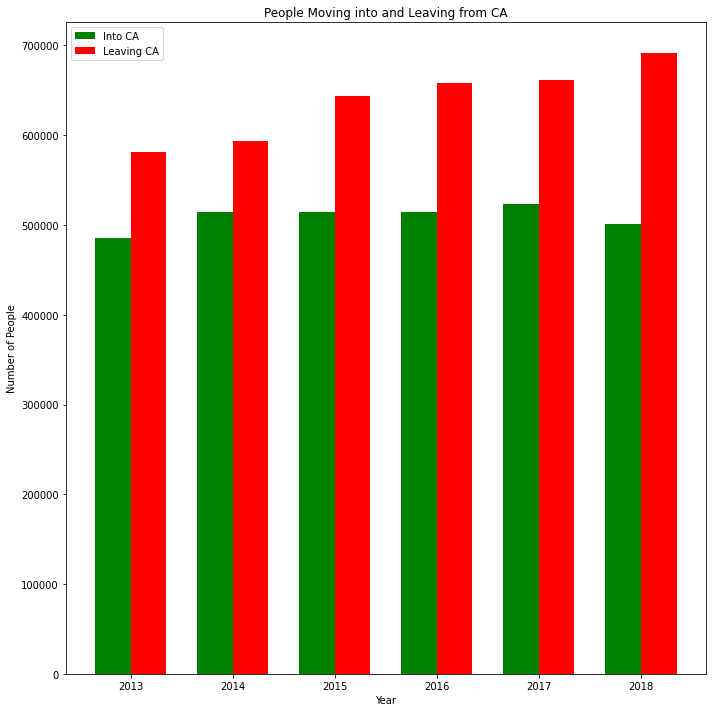

In [3]:
# Use the information from the DataFrame to create an array
labels = ["2013", "2014", "2015", "2016", "2017", "2018"]
Into_CA = [485477, 513968, 514477, 514758, 523131, 501023]
Leaving_CA =[581679, 593308, 643710, 657690, 661026, 691145]

# Set the label and width for the bar chart
x_axis = np.arange(len(labels))
width = 0.35

# Create bar graph 
fig, ax = plt.subplots(figsize=(10,10))
fig1 = ax.bar(x_axis - width/2, Into_CA, width, color = "green", label = "Into CA")
fig2 = ax.bar(x_axis + width/2, Leaving_CA, width, color = "red", label = "Leaving CA")

# Set x-axis label, y-axis label, title, and legend for the bar graph
ax.set_ylabel("Number of People")
ax.set_xlabel("Year")
ax.set_title("People Moving into and Leaving from CA")
ax.set_xticks(x_axis)
ax.set_xticklabels(migration_df["Year"])
ax.legend()
fig.tight_layout()
plt.show()

 - Over the years, the number of people who have moved out of CA have increased. The number of people of people moving out of CA has increased by approximately 93,920 people between 2013-2018.

# Collecting and Cleaning Data

In [4]:
c = Census(api_key, year = 2013)

firstdata = c.acs5.get(("NAME","B01003_001E","B19301_001E", "B17001_002E"), {'for': 'state:06'})
first_pd = pd.DataFrame(firstdata)

first_pd = first_pd.rename(columns={"B01003_001E": "Population",
                                   "B19301_001E": "Per Capita Income",
                                   "B17001_002E": "Poverty Count",
                                   "NAME": "Name", "state": "State"})
first_pd["Poverty Rate"] = 100 * first_pd["Poverty Count"].astype(int)/first_pd["Population"].astype(int)

first_pd = first_pd[["State", "Name", "Population", "Per Capita Income", "Poverty Count", "Poverty Rate"]]
first_pd

,State,Name,Population,Per Capita Income,Poverty Count,Poverty Rate
0,06,California,37659181.0,29527.0,5885417.0,15.628107


In [5]:
c = Census(api_key, year = 2014)

seconddata = c.acs5.get(("NAME","B01003_001E","B19301_001E", "B17001_002E"), {'for': 'state:06'})
second_pd = pd.DataFrame(seconddata)

second_pd = second_pd.rename(columns={"B01003_001E": "Population",
                                   "B19301_001E": "Per Capita Income",
                                   "B17001_002E": "Poverty Count",
                                   "NAME": "Name", "state": "State"})

second_pd["Poverty Rate"] = 100 * second_pd["Poverty Count"].astype(int)/second_pd["Population"].astype(int)

second_pd = second_pd[["State", "Name", "Population", "Per Capita Income", "Poverty Count", "Poverty Rate"]]
second_pd

,State,Name,Population,Per Capita Income,Poverty Count,Poverty Rate
0,06,California,38066920.0,29906.0,6115244.0,16.064457


In [6]:
c = Census(api_key, year = 2015)

thirddata = c.acs5.get(("NAME","B01003_001E","B19301_001E", "B17001_002E"), {'for': 'state:06'})
third_pd = pd.DataFrame(thirddata)

third_pd = third_pd.rename(columns={"B01003_001E": "Population",
                                   "B19301_001E": "Per Capita Income",
                                   "B17001_002E": "Poverty Count",
                                   "NAME": "Name", "state": "State"})

third_pd["Poverty Rate"] = 100 * third_pd["Poverty Count"].astype(int)/third_pd["Population"].astype(int)

third_pd = third_pd[["State", "Name", "Population", "Per Capita Income", "Poverty Count", "Poverty Rate"]]
third_pd

,State,Name,Population,Per Capita Income,Poverty Count,Poverty Rate
0,06,California,38421464.0,30318.0,6135142.0,15.968007


In [7]:
c = Census(api_key, year = 2016)

fourthdata = c.acs5.get(("NAME","B01003_001E","B19301_001E", "B17001_002E"), {'for': 'state:06'})
fourth_pd = pd.DataFrame(fourthdata)

fourth_pd = fourth_pd.rename(columns={"B01003_001E": "Population",
                                   "B19301_001E": "Per Capita Income",
                                   "B17001_002E": "Poverty Count",
                                   "NAME": "Name", "state": "State"})

fourth_pd["Poverty Rate"] = 100 * fourth_pd["Poverty Count"].astype(int)/fourth_pd["Population"].astype(int)

fourth_pd = fourth_pd[["State", "Name", "Population", "Per Capita Income", "Poverty Count", "Poverty Rate"]]
fourth_pd

,State,Name,Population,Per Capita Income,Poverty Count,Poverty Rate
0,06,California,38654206.0,31458.0,6004257.0,15.533257


In [8]:
c = Census(api_key, year = 2017)

fifthdata = c.acs5.get(("NAME","B01003_001E","B19301_001E", "B17001_002E"), {'for': 'state:06'})
fifth_pd = pd.DataFrame(fifthdata)

fifth_pd = fifth_pd.rename(columns={"B01003_001E": "Population",
                                   "B19301_001E": "Per Capita Income",
                                   "B17001_002E": "Poverty Count",
                                   "NAME": "Name", "state": "State"})

fifth_pd["Poverty Rate"] = 100 * fifth_pd["Poverty Count"].astype(int)/fifth_pd["Population"].astype(int)

fifth_pd = fifth_pd[["State", "Name", "Population", "Per Capita Income", "Poverty Count", "Poverty Rate"]]
fifth_pd

,State,Name,Population,Per Capita Income,Poverty Count,Poverty Rate
0,06,California,38982847.0,33128.0,5773408.0,14.810124


In [9]:
c = Census(api_key, year = 2018)

sixthdata = c.acs5.get(("NAME","B01003_001E","B19301_001E", "B17001_002E"), {'for': 'state:06'})
sixth_pd = pd.DataFrame(sixthdata)

sixth_pd = sixth_pd.rename(columns={"B01003_001E": "Population",
                                   "B19301_001E": "Per Capita Income",
                                   "B17001_002E": "Poverty Count",
                                   "NAME": "Name", "state": "State"})

sixth_pd["Poverty Rate"] = 100 * sixth_pd["Poverty Count"].astype(int)/sixth_pd["Population"].astype(int)

sixth_pd = sixth_pd[["State", "Name", "Population", "Per Capita Income", "Poverty Count", "Poverty Rate"]]
sixth_pd

,State,Name,Population,Per Capita Income,Poverty Count,Poverty Rate
0,06,California,39148760.0,35021.0,5487141.0,14.01613


In [10]:
merge_df = pd.merge(first_pd, second_pd, on=("Name", "Population", "Per Capita Income", "Poverty Count", "Poverty Rate", "State"), how="outer")

merge_df

,State,Name,Population,Per Capita Income,Poverty Count,Poverty Rate
0,06,California,37659181.0,29527.0,5885417.0,15.628107
1,06,California,38066920.0,29906.0,6115244.0,16.064457


In [11]:
merge_df = pd.merge(merge_df, third_pd, on=("Name", "Population", "Per Capita Income", "Poverty Count", "Poverty Rate", "State"), how="outer")

merge_df

,State,Name,Population,Per Capita Income,Poverty Count,Poverty Rate
0,06,California,37659181.0,29527.0,5885417.0,15.628107
1,06,California,38066920.0,29906.0,6115244.0,16.064457
2,06,California,38421464.0,30318.0,6135142.0,15.968007


In [12]:
merge_df = pd.merge(merge_df, fourth_pd, on=("Name", "Population", "Per Capita Income", "Poverty Count", "Poverty Rate", "State"), how="outer")

merge_df

,State,Name,Population,Per Capita Income,Poverty Count,Poverty Rate
0,06,California,37659181.0,29527.0,5885417.0,15.628107
1,06,California,38066920.0,29906.0,6115244.0,16.064457
2,06,California,38421464.0,30318.0,6135142.0,15.968007
3,06,California,38654206.0,31458.0,6004257.0,15.533257


In [13]:
merge_df = pd.merge(merge_df, fifth_pd, on=("Name", "Population", "Per Capita Income", "Poverty Count", "Poverty Rate", "State"), how="outer")

merge_df

,State,Name,Population,Per Capita Income,Poverty Count,Poverty Rate
0,06,California,37659181.0,29527.0,5885417.0,15.628107
1,06,California,38066920.0,29906.0,6115244.0,16.064457
2,06,California,38421464.0,30318.0,6135142.0,15.968007
3,06,California,38654206.0,31458.0,6004257.0,15.533257
4,06,California,38982847.0,33128.0,5773408.0,14.810124


In [14]:
merge_df = pd.merge(merge_df, sixth_pd, on=("Name", "Population", "Per Capita Income", "Poverty Count", "Poverty Rate", "State"), how="outer")

merge_df

,State,Name,Population,Per Capita Income,Poverty Count,Poverty Rate
0,06,California,37659181.0,29527.0,5885417.0,15.628107
1,06,California,38066920.0,29906.0,6115244.0,16.064457
2,06,California,38421464.0,30318.0,6135142.0,15.968007
3,06,California,38654206.0,31458.0,6004257.0,15.533257
4,06,California,38982847.0,33128.0,5773408.0,14.810124
5,06,California,39148760.0,35021.0,5487141.0,14.016130


In [15]:
merge_df["Year"]=["2013", "2014", "2015", "2016", "2017", "2018"]
del merge_df["State"]
del merge_df["Name"]

merge_df

,Population,Per Capita Income,Poverty Count,Poverty Rate,Year
0,37659181.0,29527.0,5885417.0,15.628107,2013
1,38066920.0,29906.0,6115244.0,16.064457,2014
2,38421464.0,30318.0,6135142.0,15.968007,2015
3,38654206.0,31458.0,6004257.0,15.533257,2016
4,38982847.0,33128.0,5773408.0,14.810124,2017
5,39148760.0,35021.0,5487141.0,14.016130,2018


In [46]:
final_merge=merge_df[["Year", "Population", "Per Capita Income", "Poverty Count", "Poverty Rate"]]
final_merge["Population"] = final_merge["Population"].map("{:,}".format)
final_merge["Per Capita Income"] = final_merge["Per Capita Income"].map("{:,}".format)
final_merge["Poverty Count"] = final_merge["Poverty Count"].map("{:,}".format)
final_merge["Poverty Rate"] = final_merge["Poverty Rate"].map("{:,.2f}%".format)
final_merge

,Year,Population,Per Capita Income,Poverty Count,Poverty Rate
0,2013,"37,659,181.0","29,527.0","5,885,417.0",15.63%
1,2014,"38,066,920.0","29,906.0","6,115,244.0",16.06%
2,2015,"38,421,464.0","30,318.0","6,135,142.0",15.97%
3,2016,"38,654,206.0","31,458.0","6,004,257.0",15.53%
4,2017,"38,982,847.0","33,128.0","5,773,408.0",14.81%
5,2018,"39,148,760.0","35,021.0","5,487,141.0",14.02%


# Population

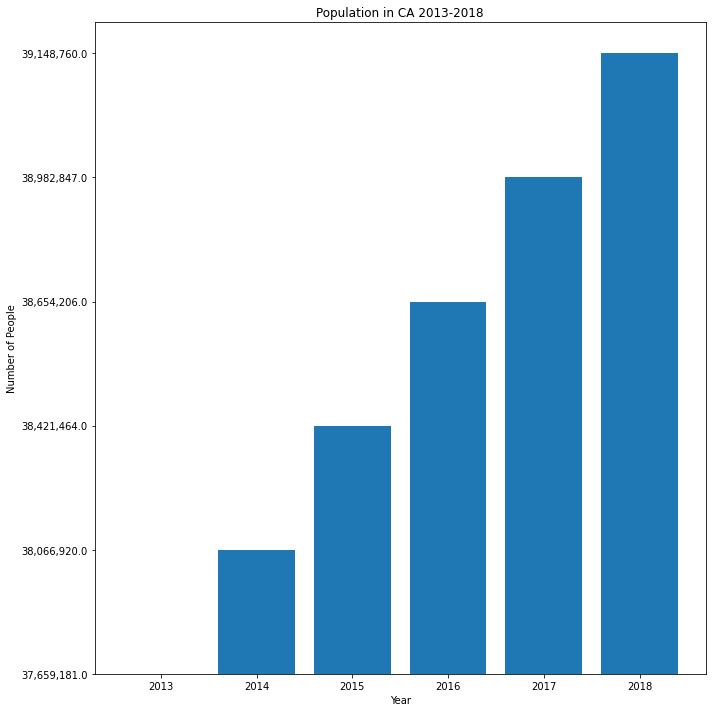

In [47]:
x_axis = np.arange(len(final_merge))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,10))
plt.bar(x_axis, final_merge["Population"])
plt.xticks(tick_locations, final_merge["Year"])
plt.title("Population in CA 2013-2018")
plt.xlabel("Year")
plt.ylabel("Number of People")
plt.tight_layout()
plt.show()